In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path = r"C:\Users\Obaid\Downloads\IRIS.csv"
iris_data = pd.read_csv(file_path)

In [5]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris_data.duplicated().sum()

3

In [13]:
iris_data.drop_duplicates(inplace=True)
iris_data.shape

(147, 5)

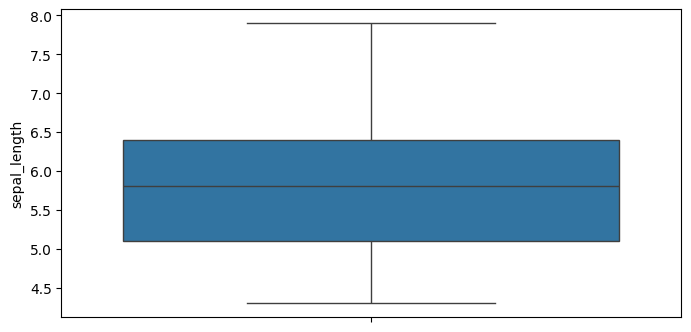

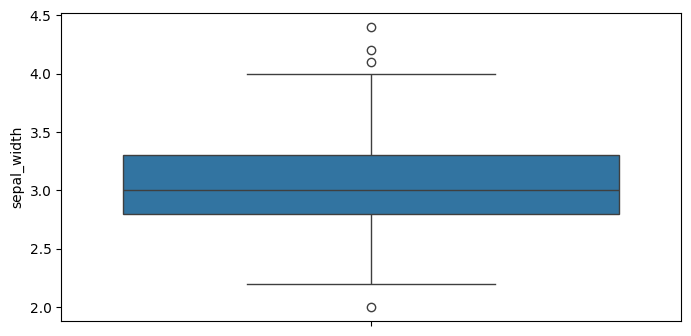

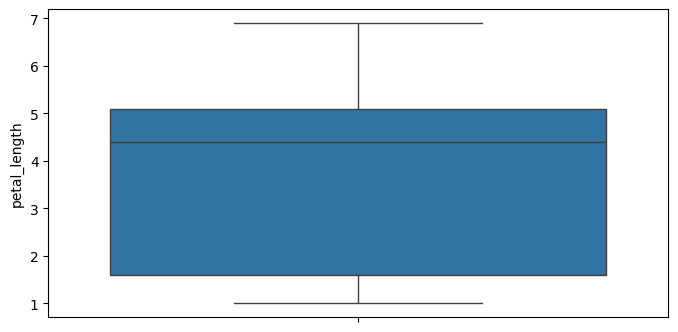

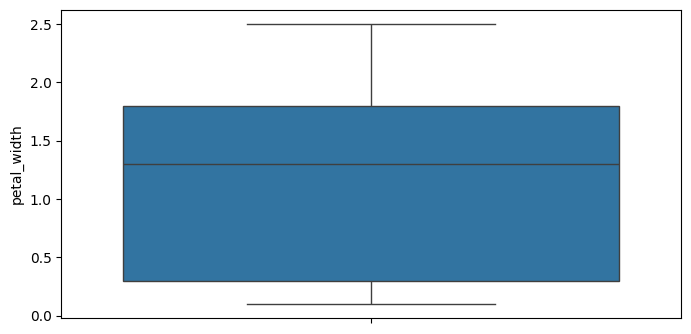

In [14]:
for i in iris_data.columns:
    if iris_data[i].dtype=='float64':
        plt.figure(figsize=(8,4))
        sns.boxplot(iris_data[i])
        plt.show()

In [17]:
q1,q3=np.percentile(iris_data['sepal_width'],[25,75])
iqr=q3-q1
upper_fence=q3+(1.5*iqr)
lower_fence=q1-(1.5*iqr)
iris_data['sepal_width'] = iris_data['sepal_width'].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x < lower_fence else x)

<Axes: ylabel='sepal_width'>

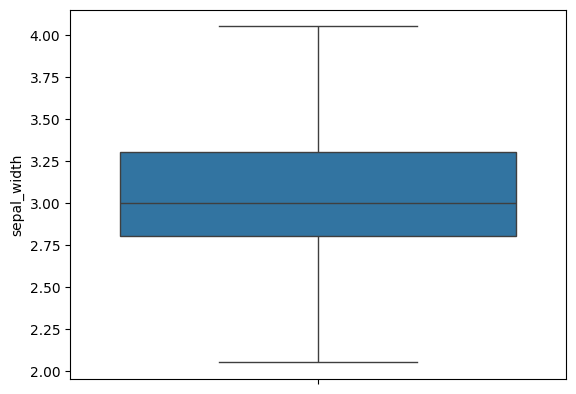

In [18]:
sns.boxplot(iris_data['sepal_width'])

In [19]:
iris_data.species.value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='species'>

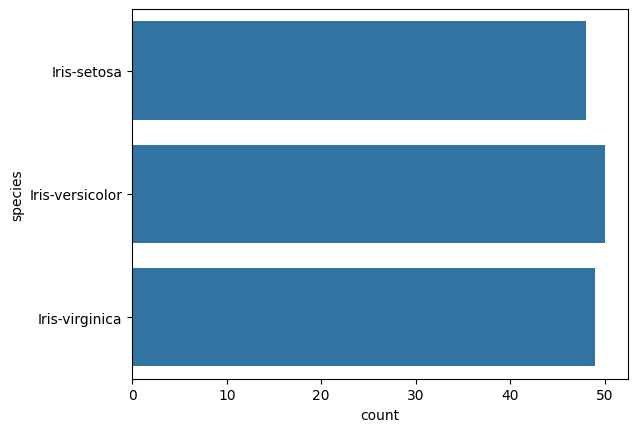

In [20]:
sns.countplot(iris_data.species)

In [21]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [22]:
iris_data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

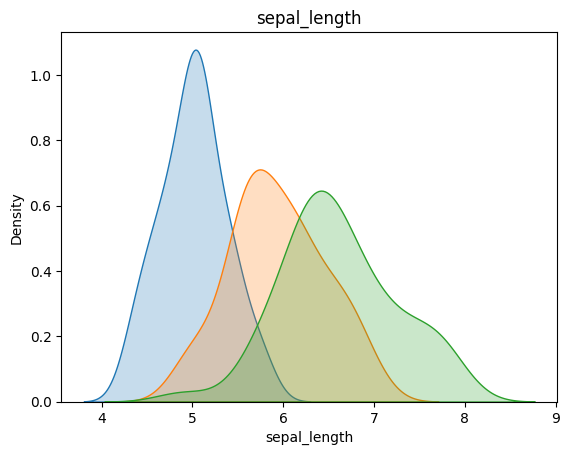

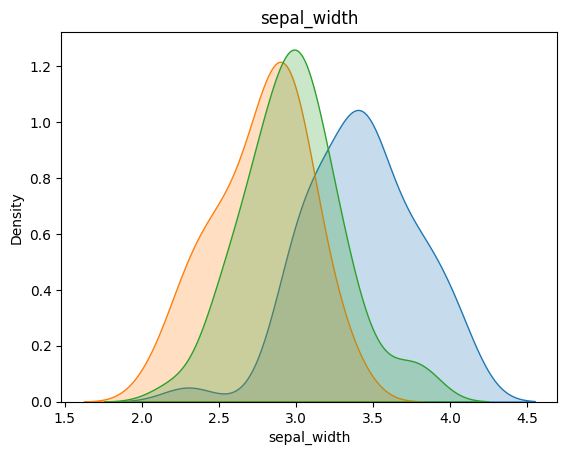

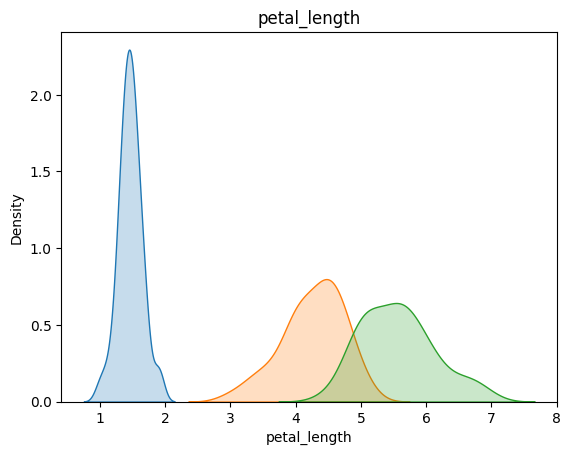

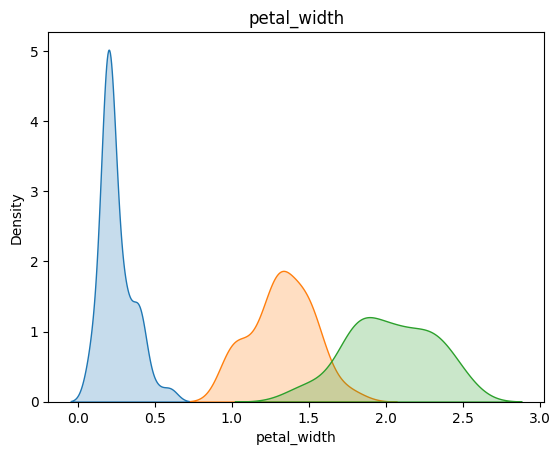

In [23]:
for i in iris_data.columns[:-1]:
    sns.kdeplot(data=iris_data.loc[iris_data.species=='Iris-setosa'][i],label='Iris-setosa',shade=True)
    sns.kdeplot(data=iris_data.loc[iris_data.species=='Iris-versicolor'][i],label='Iris-versicolor',shade=True)
    sns.kdeplot(data=iris_data.loc[iris_data.species=='Iris-virginica'][i],label='Iris-virginica',shade=True)
    plt.title(i);
    plt.show()

In [27]:
iris_data.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[147 rows x 5 columns]>

In [29]:
numeric_columns = iris_data.select_dtypes(include=[np.number])

In [30]:
corr_matrix = numeric_columns.corr()

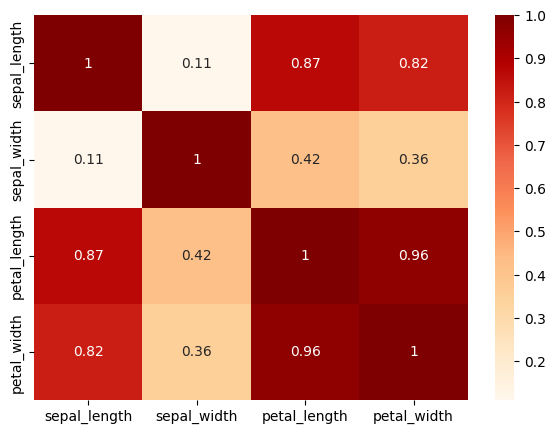

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(abs(corr_matrix), cmap='OrRd', annot=True)
plt.show()

In [37]:
from sklearn.cluster import KMeans

In [39]:
SSE= []
for i in range(1, 10):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    Kmeans.fit(iris_data.iloc[:, [1, 2, 3]])  # Assuming the columns 1, 2, 3 are numeric
    SSE.append(Kmeans.inertia_)

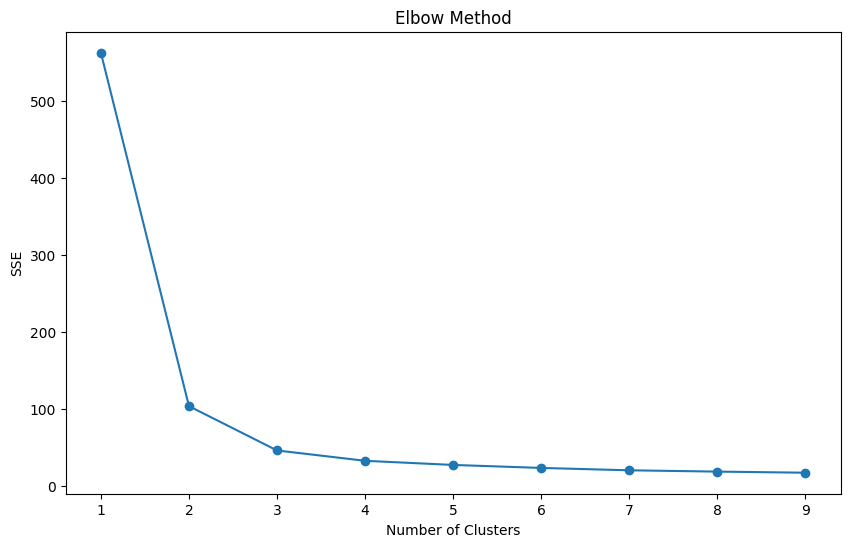

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10, 1), SSE, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [42]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(iris_data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.885     , 2.7425    , 4.37666667, 1.42666667]])

In [43]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [44]:
iris_data['cluster']=kmeans.labels_
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [45]:
display(iris_data['cluster'].value_counts(),iris_data['species'].value_counts())

cluster
2    60
1    48
0    39
Name: count, dtype: int64

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

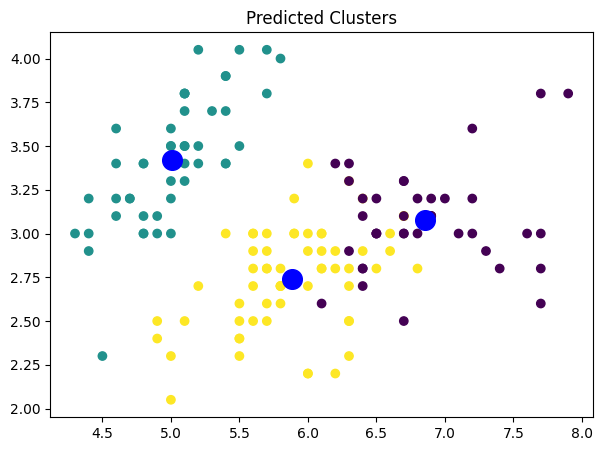

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(iris_data['sepal_length'],iris_data['sepal_width'],c=iris_data.cluster)
plt.title('Predicted Clusters')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='blue',label='centroids')
plt.show

In [53]:
iris_data.loc[iris_data['species']=='Iris-setosa']['cluster'].value_counts()

cluster
1    48
Name: count, dtype: int64

In [54]:
iris_data.loc[iris_data['species']=='Iris-versicolor']['cluster'].value_counts()

cluster
2    47
0     3
Name: count, dtype: int64

In [55]:
iris_data.loc[iris_data['species']=='Iris-virginica']['cluster'].value_counts()

cluster
0    36
2    13
Name: count, dtype: int64

In [56]:
iris_data['species_encoded']=iris_data['species'].apply(lambda x: 1 if x=='Iris-setosa'else 2 if x=='Iris-virginica' else 0)

In [57]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,2


In [58]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(iris_data['species_encoded'],iris_data['cluster']))

              precision    recall  f1-score   support

           0       0.08      0.06      0.07        50
           1       1.00      1.00      1.00        48
           2       0.22      0.27      0.24        49

    accuracy                           0.44       147
   macro avg       0.43      0.44      0.44       147
weighted avg       0.42      0.44      0.43       147



In [62]:
from sklearn.metrics import confusion_matrix

<Axes: >

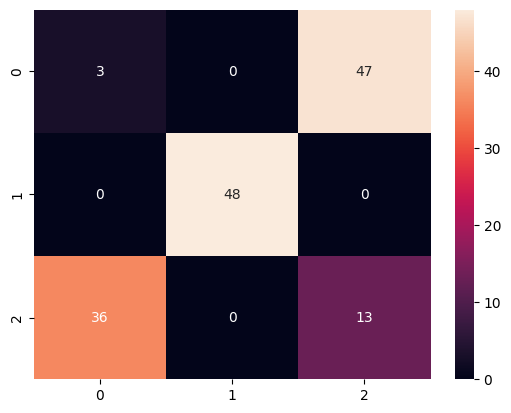

In [64]:
sns.heatmap(confusion_matrix(iris_data['species_encoded'],iris_data['cluster']),annot=True)